# Approaching Categorical Variables

### What are Categorical Variables ?

There are two types of catgorical variables:

1. <b>Nominal Variables</b> are variables that have two or more categories which do not have any kind of order associated with them. For example, gender 

2. <b>Ordinal Variables</b> have “levels” or categories with a particular order associated with them.  
For e.g., low, medium, high. Order is important

#### Another classification

1. Binary: True and False
2. Cycle: Days of a week


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../input/cat_train.csv")

In [3]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


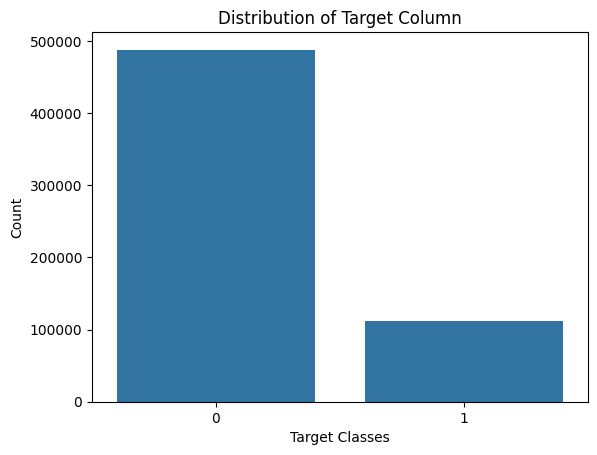

In [7]:
targets = df["target"].value_counts()

sns.countplot(x="target", data=df)
plt.title("Distribution of Target Column")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


Clearly, the target column is skewed so we will use AUC as our evaluation metric.


Overall, there are:  
- Five binary variables
- Ten nominal variables. 
- Six ordinal variables. 
- Two cyclic variables. 
- And a target variable. 

In [11]:
df["ord_2"].value_counts()

ord_2
Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: count, dtype: int64

We have to know that computers do not understand text data and thus, we need to
convert these categories to numbers. A simple way of doing this would be to create
a dictionary that maps these values to numbers starting from 0 to N-1, where N is
the total number of categories in a given feature.

In [12]:
mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
}

In [13]:
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

In [14]:
df.ord_2.value_counts()

ord_2
0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: count, dtype: int64

This type of encoding of categorical variables is known as Label Encoding, i.e.,
we are encoding every category as a numerical label.

We can do the same by using LabelEncoder from scikit-learn

In [ ]:
import pandas
from sklearn import preprocessing

# read the data
df = pd.read_csv("../input/cat_train.csv")

# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")

# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()

# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

In [ ]:
df["ord_2"].value_counts()

ord_2
2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: count, dtype: int64

📌 Label Encoding & Model Compatibility


✅ Works well with Tree-based models

- Models: Decision Trees, Random Forest, Extra Trees, XGBoost, LightGBM, GBM
- Reason: Trees only split on feature values (<= threshold) → they don’t assume numeric distance has meaning.
- Example: Encoded as Cold=0, Hot=1, Warm=2 → tree just checks splits like ord_2 <= 0.5.

❌ Not suitable for Linear, SVM, Neural Nets

- Models: Linear/Logistic Regression, SVM, Neural Networks
- Reason: These models treat numbers as continuous with order & distance.
- Warm=2 looks "twice as hot" as Hot=1 → introduces fake ordinal relationships.
- Fix: Use One-Hot Encoding (or embeddings for NN).

📊 Normalization / Standardization

- Normalization: scale features to [0, 1].
- Standardization: rescale features to mean = 0, std = 1.
- Needed for linear/SVM/NN → ensures features are on the same scale for optimization & distance calculations.
- Not needed for tree models.

👍🏻 Thumb Rule: 
- Tree models → LabelEncoder (fine).
- Linear/SVM/NN → One-Hot Encoding + Normalization/Standardization.

For Models like LR, SVM and NN, we can binarize the data 
- Freezing      --> 0 --> 0 0 0
- Warm          --> 1 --> 0 0 1
- Cold          --> 2 --> 0 1 0
- Boiling Hot   --> 3 --> 0 1 1
- Hot           --> 4 --> 1 0 0
- Lava Hot      --> 5 --> 1 0 1

In [21]:
import numpy as np

# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)

# print size in bytes
print(example.nbytes)

72


#### **Sparse Format**

A sparse format is nothing but a representation or way of storing
data in memory in which you do not store all the values but only the values that
matter. For e.g., positions of ones

In [19]:
import numpy as np
from scipy import sparse

# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(sparse_example.data.nbytes)

32


In [23]:
print(sparse_example)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 2)	1
  (1, 0)	1
  (2, 0)	1
  (2, 2)	1


In [20]:
print(
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

64


In [ ]:
# Following code will take a lot of space so I am just putting it here, but I wont run it

# import numpy as np
# from scipy import sparse 

# # number of rows
# n_rows = 10000

# # number of columns
# n_cols = 100000

# # create random binary matrix with only 5% values as 1s
# example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))

# # print size in bytes
# print(f"Size of dense array: {example.nbytes}")

# # convert numpy array to sparse CSR matrix
# sparse_example = sparse.csr_matrix(example)

# # print size of this sparse matrix
# print(f"Size of sparse array: {sparse_example.data.nbytes}")
# full_size = (
#     sparse_example.data.nbytes +
#     sparse_example.indptr.nbytes +
#     sparse_example.indices.nbytes
#     )

# # print full size of this sparse matrix
# print(f"Full size of sparse array: {full_size}")

This prints:  
Size of dense array: 8000000000.    
Size of sparse array: 399932496.     
Full size of sparse array: 599938748. 


So, dense array takes ~8000MB or approximately 8GB of memory. The sparse
array, on the other hand, takes only 399MB of memory.

### One-Hot Encoding

**One-Hot Encoding** creates one column for each category, marking the presence of a category with a 1 and all others with 0. It’s faster and clearer when categories are few.   
**Binary Encoding** assigns each category a unique number and then represents it in binary form, which uses fewer columns and is faster for large category sets but mixes information across bits.

In [24]:
import numpy as np
from scipy import sparse

# create binary matrix
example = np.array(
    [
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]
    ]
)

# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")
full_size = (
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 144
Size of sparse array: 24
Full size of sparse array: 52


In [ ]:
# This will again take a lot of storage so I won't run it 

# import numpy as np
# from sklearn import preprocessing

# # create random 1-d array with 1001 different categories (int)
# example = np.random.randint(1000, size=1000000)

# # initialize OneHotEncoder from scikit-learn
# # keep sparse = False to get dense array
# ohe = preprocessing.OneHotEncoder(sparse=False)

# # fit and transform data with dense one hot encoder
# ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# # print size in bytes for dense array
# print(f"Size of dense array: {ohe_example.nbytes}")

# # initialize OneHotEncoder from scikit-learn
# # keep sparse = True to get sparse array
# ohe = preprocessing.OneHotEncoder(sparse=True)

# # fit and transform data with sparse one-hot encoder
# ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# # print size of this sparse matrix
# print(f"Size of sparse array: {ohe_example.data.nbytes}")
# full_size = (
#     ohe_example.data.nbytes +
#     ohe_example.indptr.nbytes + ohe_example.indices.nbytes
# )

# # print full size of this sparse matrix
# print(f"Full size of sparse array: {full_size}")

And this code prints:  
Size of dense array: 8000000000. 
Size of sparse array: 8000000. 
Full size of sparse array: 16000004. 

Dense array size here is approximately 8GB and sparse array is 8MB.

* Besides Label Encoding, Binarization, and One-Hot Encoding, categorical variables can also be converted to numerical features.

* Example: Count how many times a category appears (e.g., `ord_2 = "Boiling Hot"` appears 84,790 times).

* Use `groupby` + `transform` in pandas to replace categorical values with their counts.

* Can group by multiple columns (e.g., `ord_1` and `ord_2`) and count occurrences → adds richer numerical features.

* Instead of replacing, counts can also be added as new features.

* New categorical features can be created by combining existing features (e.g., `ord_1 + "_" + ord_2`).

* Even NaN values can be treated as a valid category in such combinations.

* No fixed rule on which categories to combine → depends on domain knowledge and data context.

* Greedy approach: create many feature combinations, let the model decide which ones are useful.


Whenever you get categorical variables, follow these simple steps:  

* **Step 1:** Fill missing values (very important).
* **Step 2:** Encode categories into numbers.
  * For **Tree-based models (RF, XGBoost, LightGBM, CatBoost)** → use **Label Encoding**.
  * For **Linear models, SVM, Neural Networks** → use **One-Hot Encoding** (or embeddings).
* **Step 3:** Train your model with the chosen encoding.

👉 **Shortcut:** If you already know you’ll one-hot encode, you don’t need to label encode first — tools like `pd.get_dummies` or `OneHotEncoder` can handle string categories directly.

Handling NaN data in categorical features is quite essential else you can get the
infamous error from scikit-learn’s LabelEncoder:

```
ValueError: y contains previously unseen labels: [nan, nan, nan, nan, nan, nan, nan, nan]
```

* NaN values in test data usually mean you forgot to handle them during training.
* ❌ Dropping rows with NaNs is simple but not ideal → you lose information.
* ⚠️ If many rows have NaNs, dropping is not even possible.
* ✅ Best practice: **treat NaNs as a new category** (e.g., "Unknown") → easy to do with pandas.


In [26]:
df.ord_2.value_counts()

ord_2
2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: count, dtype: int64

* Adding NaNs as a category increases total categories (e.g., from 6 → 7), which is fine since it adds useful info.
* **Rare categories** = categories that are unseen in training or appear very few times.
* If unseen categories appear in production, pipeline will throw an error → must handle them.
* Solutions for rare/unseen categories:

  * Treat them as a new "rare" category.
  * Predict them using a model (e.g., nearest neighbour).
  * Train an auxiliary model to predict missing/rare values (may or may not work well).
  * Concatenate **train + test data** to capture rare categories (semi-supervised style).
* Concern: possible overfitting.
* Fix: use **proper cross-validation** that mimics test-time scenario (ensure validation folds include unseen categories just like test).


In [27]:
import pandas as pd
from sklearn import preprocessing

# read training data
train = pd.read_csv("../input/cat_train.csv")

#read test data
test = pd.read_csv("../input/cat_test.csv")

# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1

# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)

# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]

# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()

    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)

# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

* The concatenate train + test trick works only when you already know the full test set in advance (like in Kaggle competitions).
* But in real-world production (live systems like RTB), you don’t know future test data → new categories (like a new page on a website) can suddenly appear.
* If you only used the concatenation trick, your encoder won’t know what to do with those new/unseen categories → the model will fail.
* The safer solution in production = always reserve an "unknown" category in your encoding, so that any unseen value can be mapped there instead of breaking the model. 


* Map **missing values → "NONE"** and **rare/unseen categories → "RARE"**.
* This makes the model robust to **new categories** in live/test data.
